# Improving your IRASA model fits

When fitting IRASA we sometimes face the situation that residual periodic activity remains in our aperiodic spectrum.
In this notebook I will illustrate two possible ways that could lead to this situation and how to avoid it.
First we start again by simulating a fairly simple signal consisting of a 10Hz oscillation and an aperiodic exponent of 1.

In [1]:
from neurodsp.sim import sim_combined
from neurodsp.utils import create_times
import numpy as np
import scipy.signal as dsp
import matplotlib.pyplot as plt
import pandas as pd
from pyrasa.irasa import irasa

In [2]:
fs = 500
n_seconds = 60

sim_components = {'sim_powerlaw': {'exponent' : -1}, 
                  'sim_oscillation': {'freq' : 10}}


sig = sim_combined(n_seconds=n_seconds, fs=fs, components=sim_components)
times = create_times(n_seconds=n_seconds, fs=fs)

## Case #1: Increase your frequency resolution

When the frequency resolution for your psd is "low" up/-downsampling is not enough to reliably get rid of peaks in the signal.
As can be seen below where a duration of 1s was not enough to obtain a "peak-free" spectrum.

,Offset,Exponent,fit_type,ch_name
0,-1.168134,1.037697,fixed,0


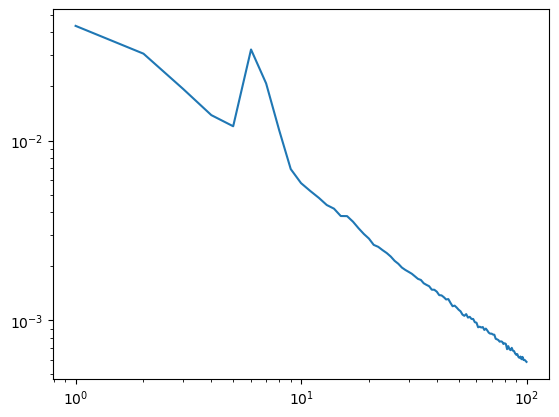

In [12]:
#low segment length
duration=1
overlap=0.5
irasa_out = irasa(sig, 
                    fs=fs, 
                    band=(1, 100), 
                    psd_kwargs={'nperseg': int(duration*fs), 
                                'noverlap': int(duration*fs*overlap)
                            },
                    hset_info=(1, 2, 0.05))

plt.loglog(irasa_out.freqs, irasa_out.aperiodic.T)

irasa_out.fit_aperiodic_model().aperiodic_params

Increasing the length of each segment (i.e. the "duration") should help you out.

,Offset,Exponent,fit_type,ch_name
0,-1.25566,0.99467,fixed,0


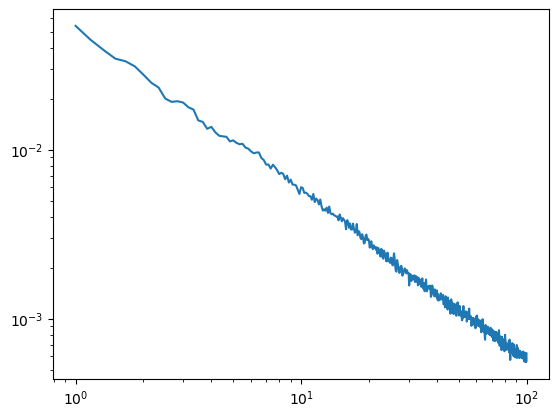

In [13]:
#Increased segment length
duration=6
overlap=0.5
irasa_out = irasa(sig, 
                    fs=fs, 
                    band=(1, 100), 
                    psd_kwargs={'nperseg': int(duration*fs), 
                                'noverlap': int(duration*fs*overlap),
                            },
                    hset_info=(1, 2, 0.05))

plt.loglog(irasa_out.freqs, irasa_out.aperiodic.T)

irasa_out.fit_aperiodic_model().aperiodic_params

## Case #2: Increase your hmax

Sometimes we either can't or don't want to increase our frequency resolution. In this case we can increase our maximal up/-downsampling factors to get rid of peaks in the signal.
However, be aware that this can - depending on our filter settings and sampling rate - limit the frequency range that we can sensibly evaluate (see irasa_pitfalls.ipynb).


,Offset,Exponent,fit_type,ch_name
0,-1.252254,0.991107,fixed,0


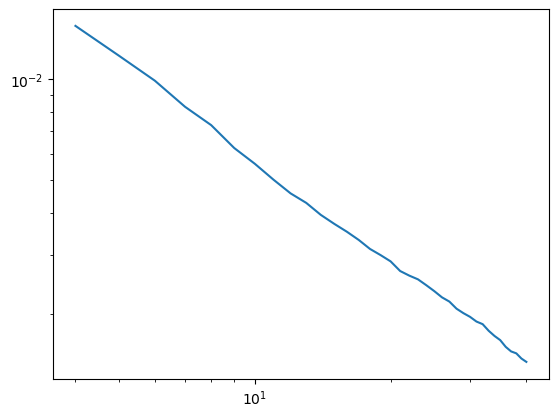

In [11]:
#low segment length, but high hset
duration=1
overlap=0.5
irasa_out = irasa(sig, 
                    fs=fs, 
                    band=(4, 40), 
                    psd_kwargs={'nperseg': int(duration*fs), 
                                'noverlap': int(duration*fs*overlap)
                            },
                    hset_info=(1.1, 6, 0.05))

plt.loglog(irasa_out.freqs, irasa_out.aperiodic.T)

irasa_out.fit_aperiodic_model().aperiodic_params